In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import time
import torch
from concurrent.futures import ThreadPoolExecutor, wait, as_completed
from torch.utils.data.dataset import Dataset
from tqdm import tqdm

METADATA_DIR = 'data/metadata'
FACES_DIR = 'faces_saved'

%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [2]:
%%time

with open('FACES_PATHS.pickle', 'rb') as handle:
    FACES_PATHS = pickle.load(handle)

with open('FACES_LABELS.pickle', 'rb') as handle:
    FACES_LABELS = pickle.load(handle)

len(FACES_PATHS), len(FACES_LABELS)

CPU times: user 136 ms, sys: 60 ms, total: 196 ms
Wall time: 891 ms


(1085181, 1085181)

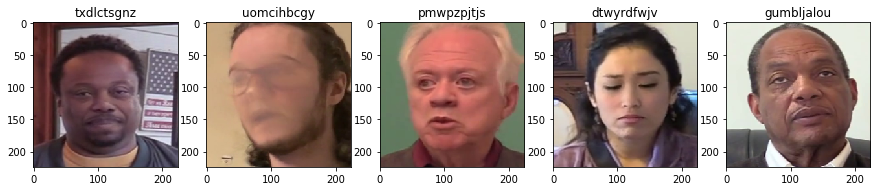

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
faces_sample = np.random.choice(FACES_PATHS, 5)
for i in range(len(faces_sample)):
    ax[i].set_title(faces_sample[i].split('/')[1])
    ax[i].imshow(cv2.cvtColor(cv2.imread(faces_sample[i]), cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
print('Number of fake faces: {}/{} ({:.2f}%)'.format(sum(FACES_LABELS), len(FACES_LABELS), np.mean(FACES_LABELS) * 100))
print('Number of real faces: {}/{} ({:.2f}%)'.format(len(FACES_LABELS) - sum(FACES_LABELS), len(FACES_LABELS), (1 - np.mean(FACES_LABELS)) * 100))


Number of fake faces: 906249/1085181 (83.51%)
Number of real faces: 178932/1085181 (16.49%)


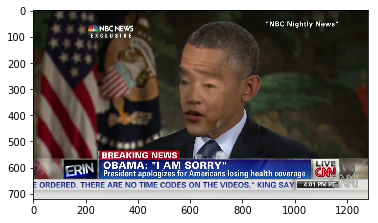

In [11]:
import cv2

def read_frame(video_path):
    capture = cv2.VideoCapture(video_path)
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #frame = cv2.resize(frame, (128, 128))
    capture.release()
    return frame
path = "/home/jupyter/data/faceforensics/manipulated_sequences/Deepfakes/c23/videos/183_253.mp4"
frame = read_frame(path)

plt.imshow(frame)

In [12]:
frame.shape

(720, 1280, 3)